## Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

### Problem 1
Implement serial test and apply to a `samples`

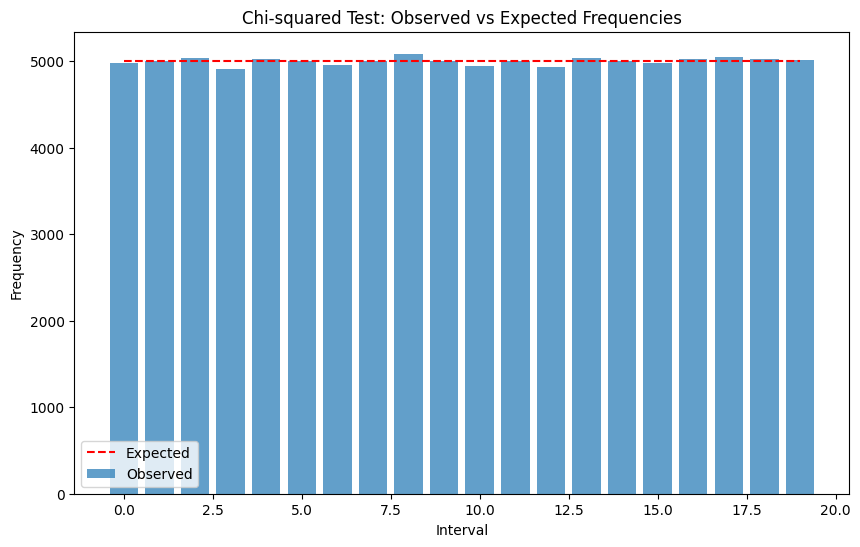

chi-square statistic: 6.251999999999999
p-value: 0.9972579419205025


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m


rng.current = 34
samples=np.array([rng() for _ in range(100000)])
res = samples.reshape(-1, 2)

k = 20
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)


plt.figure(figsize=(10, 6))
plt.bar(range(k), f_obs, alpha=0.7, label='Observed')
plt.plot(range(k), f_exp, 'r--', label='Expected')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Chi-squared Test: Observed vs Expected Frequencies')
plt.legend()
plt.show()

chi2_stat, p_value = stats.chisquare(f_obs, f_exp)

print("chi-square statistic:", chi2_stat)
print("p-value:", p_value)



### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [5]:

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

def rng_good(m=2**31, a=1103515245, c=12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1

samples1=np.array([rng_bad() for _ in range(1000)])
samples2=np.array([rng_good() for _ in range(1000)])

f_obs1 = np.histogram(samples1, np.linspace(0, 1, k+1))[0]
f_exp1 = np.full(k, len(samples1) // k)

f_obs2 = np.histogram(samples2, np.linspace(0, 1, k+1))[0]
f_exp2 = np.full(k, len(samples2) // k)

ks_statistic1, p_value1 = stats.chisquare(f_obs1, f_exp1)
ks_statistic2, p_value2 = stats.chisquare(f_obs2, f_exp2)

print(f"chisquare statistic for bad rng: {ks_statistic1}")
print(f"p-value for bad rng: {p_value1}")
if (p_value1<0.05):
  print(f'p value ~= {round(p_value1,2)} is smaller than 0.05 -> we reject the hypothesis')

print(f"chisquare statistic for good rng: {ks_statistic2}")
print(f"p-value for good rng: {p_value2}")

chisquare statistic for bad rng: 32.44
p-value for bad rng: 0.027867772740595254
p value ~= 0.03 is smaller than 0.05 -> we reject the hypothesis
chisquare statistic for good rng: 17.36
p-value for good rng: 0.5654928389864398


# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the np.random.rand() function for this). How to get a sample from another distribution  F ?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

2.009


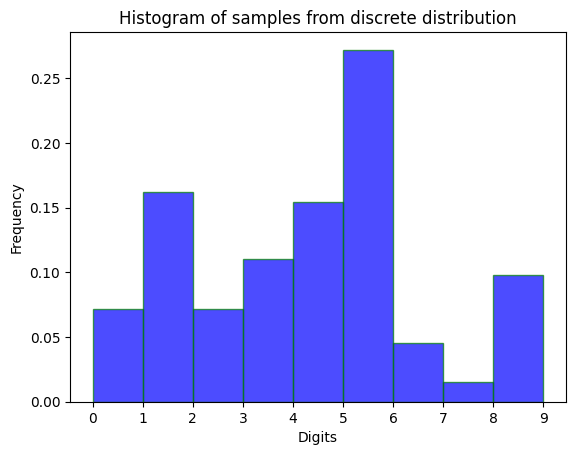

In [6]:
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
print(weights.sum())
weights = weights / weights.sum()
#print(weights)
sorted_ind = np.argsort(weights)[::-1]
sorted_set_digits = digits[sorted_ind]
sorted_weights = weights[sorted_ind]
samples = np.random.choice(sorted_set_digits, size=1000, replace = True, p = sorted_weights)


plt.hist(samples, bins = np.arange(0, 10, 1), alpha = 0.7,edgecolor='g', color = 'b', density = True)
plt.xticks(range(10))
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.title('Histogram of samples from discrete distribution')
plt.show()

## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

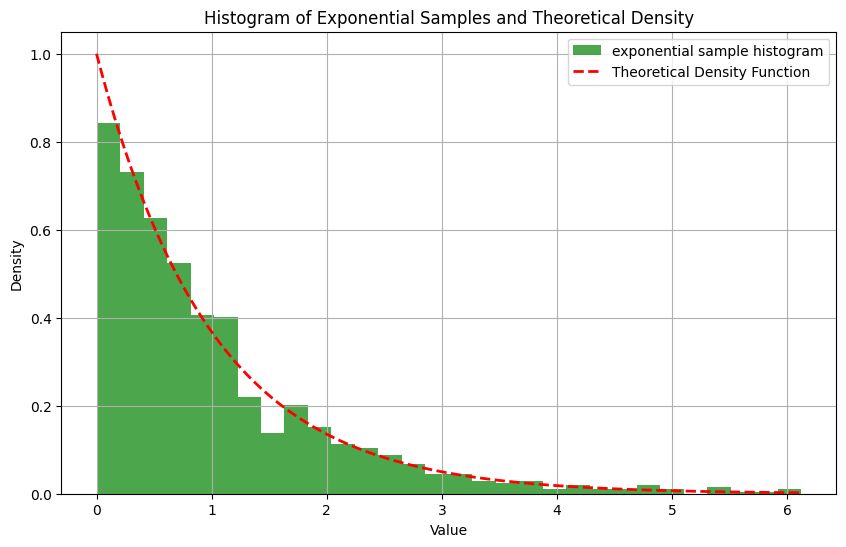

In [7]:

#F(x) = u = 1 - e^(-λ x)   for x ≥ 0
#u = 1 - e^(-λ x) -> e^(-λ x) = 1 - u -> -λ x = ln(1 - u) -> x = -ln(1 - u) / λ
#because of the symmetry u and 1-u has the same distribution -> to simplify we can look at x = -ln(u) / λ
#the inverse method is true for any continious F, strictly increasing and mapping the interval [0, 1] onto the entire range of the random variable function -> our F is suitable

lambda_p = 1.0

n_samples = 1000
uniform_samples = np.random.uniform(0, 1, n_samples)
exponential_samples = -np.log(uniform_samples) / lambda_p

plt.figure(figsize=(10, 6))
plt.hist(exponential_samples, bins=30, density=True, alpha=0.7, color='g', label='exponential sample histogram')

x = np.linspace(0, np.max(exponential_samples), 1000)
pdf = lambda_p * np.exp(-lambda_p * x)
plt.plot(x, pdf, 'r--', lw=2, label='Theoretical Density Function')

plt.title('Histogram of Exponential Samples and Theoretical Density')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

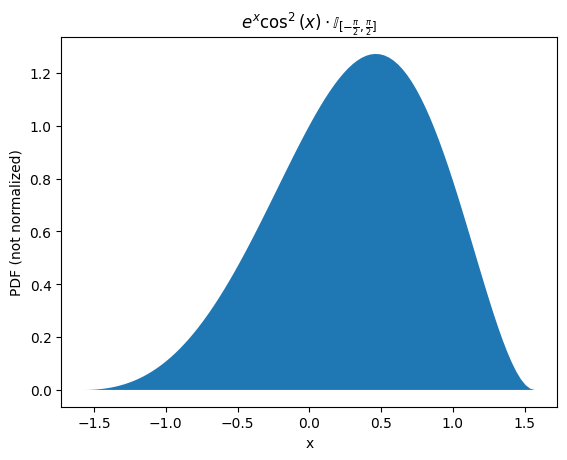

In [8]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

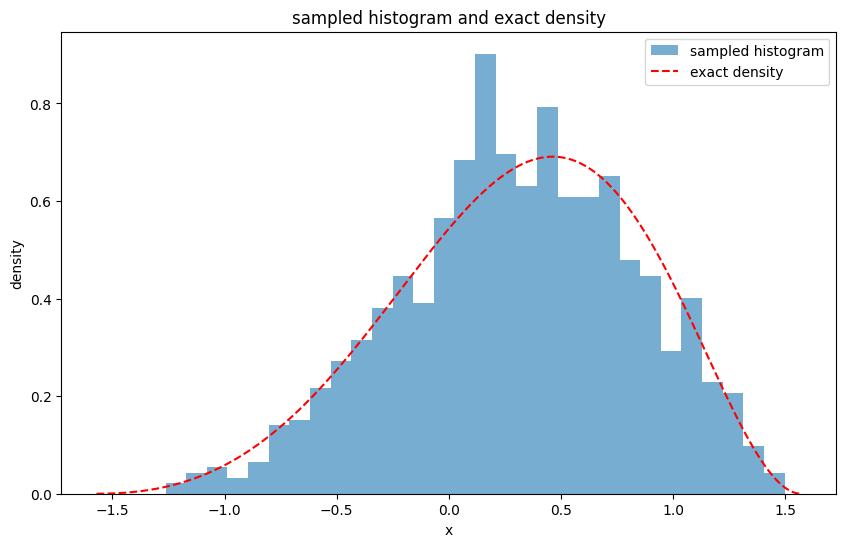

In [6]:
from scipy.integrate import quad
def target_density(x):
    return np.exp(x)*(np.cos(x)**2) * ((x >= -np.pi/2) & (x <= np.pi/2))

I = quad(target_density, -np.pi/2, np.pi/2)[0]
# let's take gaussian distribution cause its the easiest
def norm_density(x):
    return np.exp(x) * np.cos(x) ** 2 / I

def accept_reject_sampling(num_samples):
    samples = []
    while len(samples) < num_samples:
        x = np.random.uniform(-np.pi/2, np.pi/2)
        u = np.random.uniform(0, 1)
        c = np.max(target_density(np.linspace(-np.pi/2, np.pi/2, 1000))) / norm_density(x)
        if u <= target_density(x) / (c * norm_density(x)):
            samples.append(x)
    return np.array(samples)


samples = accept_reject_sampling(1000)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='sampled histogram')

x = np.linspace(-np.pi/2, np.pi/2, 1000)
plt.plot(x, norm_density(x), 'r--', label='exact density')

# Add labels and title
plt.xlabel('x')
plt.ylabel('density')
plt.title('sampled histogram and exact density')
plt.legend()
plt.show()


## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

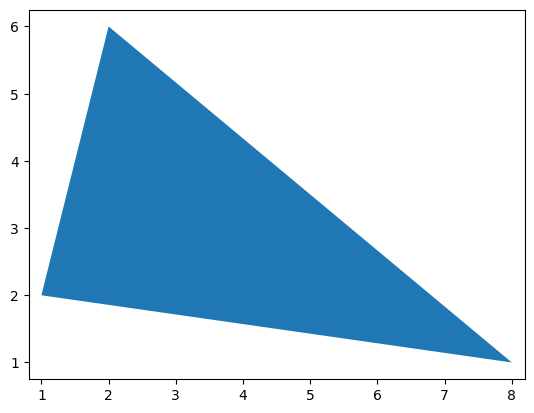

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

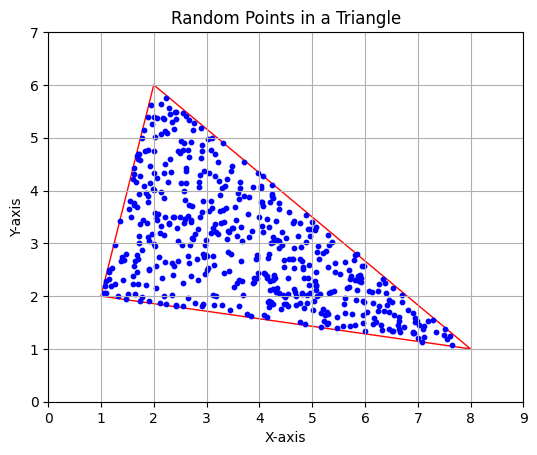

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


vertices = np.array([[1, 2], [2, 6], [8, 1]])


def random_points_in_triangle(vertices, num_points):
    r1 = np.random.rand(num_points)
    r2 = np.random.rand(num_points)

    pointss = (1 - np.sqrt(r1))[:, np.newaxis] * vertices[0] + (np.sqrt(r1) * (1 - r2))[:, np.newaxis] * vertices[1] + (np.sqrt(r1) * r2)[:, np.newaxis] * vertices[2]
    return pointss

num_samples = 500
sampled_points = random_points_in_triangle(vertices, num_samples)

fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True, fill=None, edgecolor='r')
ax.add_patch(polygon)

ax.scatter(sampled_points[:, 0], sampled_points[:, 1], color='b', s=10)
ax.set_xlim(0, 9)
ax.set_ylim(0, 7)
ax.set_aspect('equal')
plt.title("Random Points in a Triangle")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

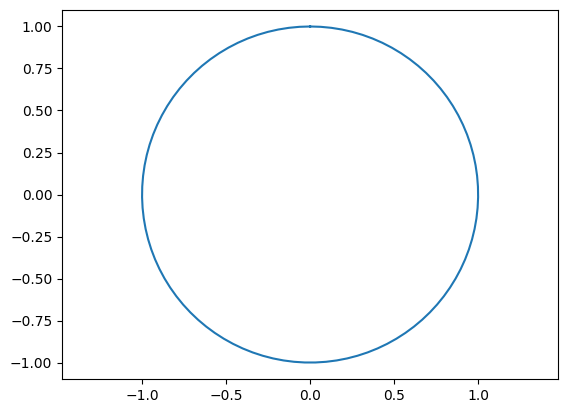

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

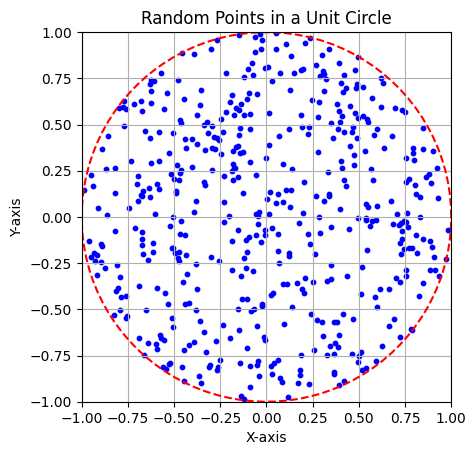

In [ ]:

num_points = 500

angles = np.random.uniform(0, 2 * np.pi, num_points)

radii = np.sqrt(np.random.uniform(0, 1, num_points))

x = radii * np.cos(angles)
y = radii * np.sin(angles)

fig, ax = plt.subplots()
ax.scatter(x, y, color='b', s=10)  # Plot the sampled points
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.set_title("Random Points in a Unit Circle")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(t), np.sin(t),'r--')

plt.grid()
plt.show()


# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

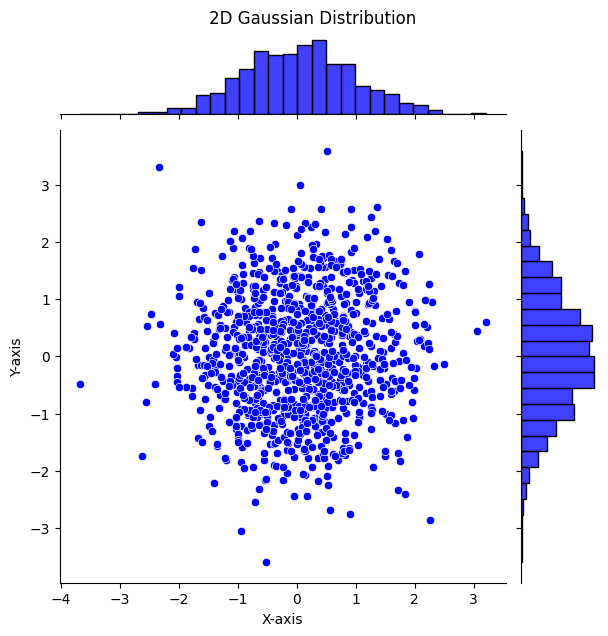

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

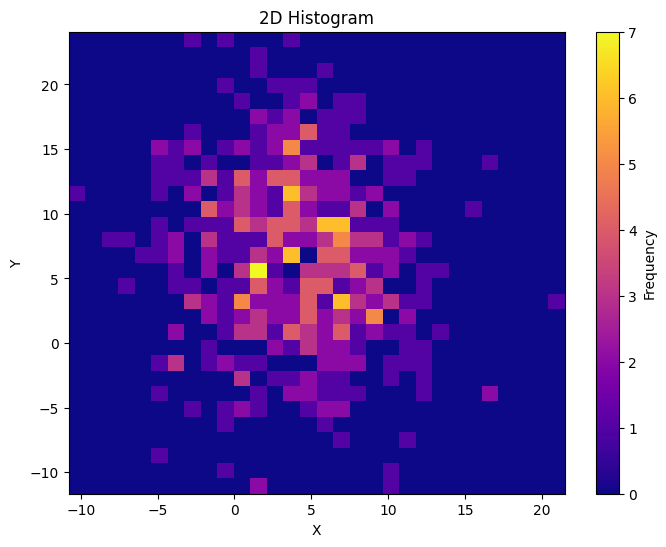

sample mean: [4.0450719  6.73328027]
sample covariance:
 [[19.73657455 -3.07737703]
 [-3.07737703 41.20662865]]
mean difference is:[ 0.0450719  -0.26671973]
covariance difference is:[[-0.26342545  0.92262297]
 [ 0.92262297  1.20662865]]


In [8]:

n = 1000
mu = np.array([4, 7])
covariance_matrix = np.array([[20, -4], [-4, 40]])

def box_muller():
    while True:
        x1 = 2 * np.random.uniform(-1,1)
        x2 = 2 * np.random.uniform(-1,1)
        s = x1**2 + x2**2
        if 0 < s < 1:
            w = np.sqrt((-2 * np.log(s)) / s)
            return x1 * w, x2 * w

def generate_multivariate_normal(mean, covariance, samples):
    num_pairs = samples // 2
    z_samples = np.array([box_muller() for _ in range(num_pairs)])

    if samples % 2 != 0:
        z_samples = np.vstack([z_samples, box_muller()])

    L = np.linalg.cholesky(covariance)

    X = mean.T + z_samples @ L.T #matrix multiplication

    return X

samples = generate_multivariate_normal(mu, covariance_matrix, n)

plt.figure(figsize=(8, 6))
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, cmap='plasma')
plt.colorbar(label='Frequency')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Histogram')
plt.show()

sample_mean = np.mean(samples, axis=0)
sample_covariance = np.cov(samples.T)

print("sample mean:", sample_mean)
print("sample covariance:\n", sample_covariance)

print(f"mean difference is:{sample_mean-mu}")
print(f"covariance difference is:{sample_covariance-covariance_matrix}")


# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



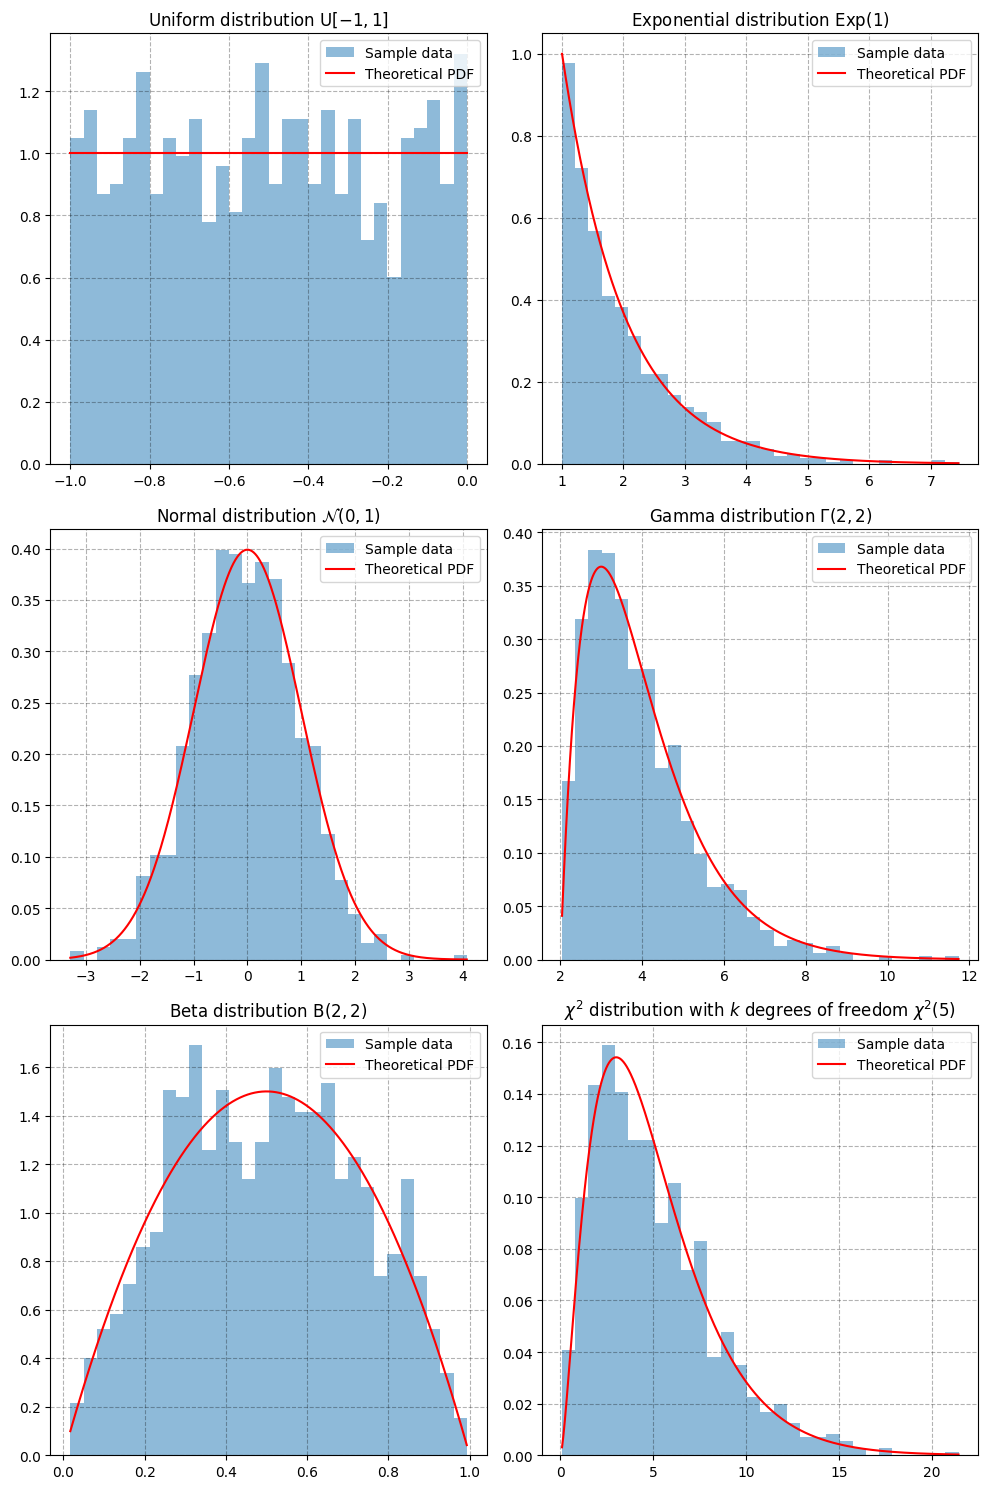

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
